https://keras-ocr.readthedocs.io/en/latest/examples/end_to_end_training.html#

In [80]:
import os
import matplotlib
from PIL import Image
import keras_ocr
import datetime
import string
import sklearn.model_selection
import imgaug
import math
import tensorflow as tf

## plot datas 

In [99]:
global_train_path='data_tata/archive/SROIE2019/train/'

box_train_path = global_train_path + 'box/'
entities_train_path = global_train_path+'entities'
img_train_path=global_train_path+'img'
print(box_train_path)

data_tata/archive/SROIE2019/train/box/


In [31]:
image_1='data_tata/archive/SROIE2019/train/img/X00016469612.jpg'
entity_1="data_tata/archive/SROIE2019/train/entities/X00016469612.txt"
box_1="data_tata/archive/SROIE2019/train/box/X00016469612.txt"

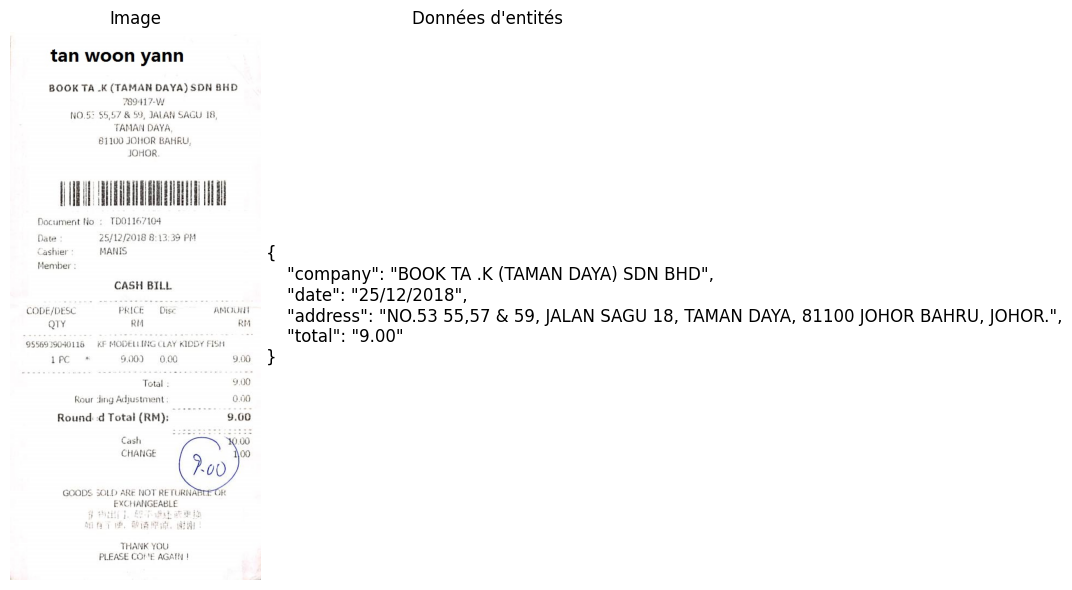

72,25,326,25,326,64,72,64,TAN WOON YANN
50,82,440,82,440,121,50,121,BOOK TA .K(TAMAN DAYA) SDN BND
205,121,285,121,285,139,205,139,789417-W
110,144,383,144,383,163,110,163,NO.53 55,57 & 59, JALAN SAGU 18,
192,169,299,169,299,187,192,187,TAMAN DAYA,
162,193,334,193,334,211,162,211,81100 JOHOR BAHRU,
217,216,275,216,275,233,217,233,JOHOR.
50,342,279,342,279,359,50,359,DOCUMENT NO : TD01167104
50,372,96,372,96,390,50,390,DATE:
165,372,342,372,342,389,165,389,25/12/2018 8:13:39 PM
48,396,117,396,117,415,48,415,CASHIER:
164,397,215,397,215,413,164,413,MANIS
49,423,122,423,122,440,49,440,MEMBER:
191,460,298,460,298,476,191,476,CASH BILL
30,508,121,508,121,523,30,523,CODE/DESC
200,507,247,507,247,521,200,521,PRICE
276,506,306,506,306,522,276,522,DISC
374,507,441,507,441,521,374,521,AMOUNT
69,531,102,531,102,550,69,550,QTY
221,531,247,531,247,545,221,545,RM
420,529,443,529,443,547,420,547,RM
27,570,137,570,137,583,27,583,9556939040116
159,570,396,570,396,584,159,584,KF MODELLING CLAY KIDDY FIS

In [39]:
import matplotlib.pyplot as plt

# Ouvrir l'image
image_1 = Image.open('data_tata/archive/SROIE2019/train/img/X00016469612.jpg')

# Ouvrir le fichier d'entités
f_e = open(entity_1, "r")
entities_data = f_e.read()
f_e.close()

# Créer la disposition en une seule ligne
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Afficher l'image
axs[0].imshow(image_1)
axs[0].axis('off')
axs[0].set_title('Image')

# Afficher les données d'entités
axs[1].axis('off')
axs[1].text(0, 0.5, entities_data, fontsize=12, verticalalignment='center')
axs[1].set_title('Données d\'entités')

# Ajuster les espacements entre les sous-graphiques
plt.tight_layout()

# Afficher le graphique
plt.show()

# Ouvrir le fichier de boîtes
f_b = open(box_1, "r")
print(f_b.read())
f_b.close()




## Mettre les données au bon format 

Pour pouvoir être utilisés, les labels doivent corrspondre à une liste de tuples comme expliqué dans la librairie : 
((x1, y1), (x2, y2), (x3, y3), (x4, y4), c)

108 225 132 168 147 158 131 187 172 "F" -> ça dans un txt 

In [142]:
line = "72,25,326,25,326,64,72,64,TAN WOON YANN"
values = line.split(",")

# Extraire les coordonnées et le label
x1, y1, x2, y2, x3, y3, x4, y4, label = values[:9]

# Formater les valeurs dans le format ((x1, y1), (x2, y2), (x3, y3), (x4, y4), c)
box = ((int(x1), int(y1)), (int(x2), int(y2)), (int(x3), int(y3)), (int(x4), int(y4)), label)

print(box)

((72, 25), (326, 25), (326, 64), (72, 64), 'TAN WOON YANN')


In [141]:
file = open(box_1, "r")
# print(file)

for i in file :
    count = 0
 
    while True:
        count += 1
        line = file.readlines()
        for string in line :
    
            values = string.split(",")
            # Extraire les coordonnées et le label
            x1, y1, x2, y2, x3, y3, x4, y4, label = values[:9]
            # Formater les valeurs dans le format ((x1, y1), (x2, y2), (x3, y3), (x4, y4), c)
            box = ((int(x1), int(y1)), (int(x2), int(y2)), (int(x3), int(y3)), (int(x4), int(y4)), label)




            
            
        
    
#     print(i.split())
    
    

# # empty_list

KeyboardInterrupt: 

In [114]:
# create_label_format
"""takes my data labels and put it in right format """

box_files_list = os.listdir(box_train_path)
# open folder
for filename in os.listdir(box_train_path) :
    box_path = os.path.join(box_train_path, filename)
#     write in files 
    if os.path.isfile(box_path):
        with open(box_path, "r") as f_b:
            
#             print(f_b.write
    
        
((x1, y1), (x2, y2), (x3, y3), (x4, y4), c)



72,25,326,25,326,64,72,64,TAN WOON YANN
50,82,440,82,440,121,50,121,BOOK TA .K(TAMAN DAYA) SDN BND
205,121,285,121,285,139,205,139,789417-W
110,144,383,144,383,163,110,163,NO.53 55,57 & 59, JALAN SAGU 18,
192,169,299,169,299,187,192,187,TAMAN DAYA,
162,193,334,193,334,211,162,211,81100 JOHOR BAHRU,
217,216,275,216,275,233,217,233,JOHOR.
50,342,279,342,279,359,50,359,DOCUMENT NO : TD01167104
50,372,96,372,96,390,50,390,DATE:
165,372,342,372,342,389,165,389,25/12/2018 8:13:39 PM
48,396,117,396,117,415,48,415,CASHIER:
164,397,215,397,215,413,164,413,MANIS
49,423,122,423,122,440,49,440,MEMBER:
191,460,298,460,298,476,191,476,CASH BILL
30,508,121,508,121,523,30,523,CODE/DESC
200,507,247,507,247,521,200,521,PRICE
276,506,306,506,306,522,276,522,DISC
374,507,441,507,441,521,374,521,AMOUNT
69,531,102,531,102,550,69,550,QTY
221,531,247,531,247,545,221,545,RM
420,529,443,529,443,547,420,547,RM
27,570,137,570,137,583,27,583,9556939040116
159,570,396,570,396,584,159,584,KF MODELLING CLAY KIDDY FIS

148,48,564,48,564,86,148,86,HOME MASTER HARDWARE &
266,89,444,89,444,125,266,125,ELECTRICAL
85,121,625,121,625,156,85,156,NO.113G & 115G, JALAN SETIA GEMBILANG
166,161,540,161,540,194,166,194,U13/BG BANDAR SETIA ALAM,
175,204,530,204,530,235,175,235,40170 BANDAR SETIA ALAM,
275,240,428,240,428,267,275,267,SELANGOR.
151,282,553,282,553,315,151,315,COMPANY REG NO.:SA03711551-P
179,326,521,326,521,360,179,360,GST REG NO.:001637511168
263,382,433,382,433,409,263,409,TAX INVOICE
62,427,201,427,201,456,62,456,INVOICE NO.:
250,433,367,433,367,458,250,458,CS 67832
62,470,135,470,135,498,62,498,DATE :
248,475,453,475,453,500,248,500,22/12/2017 14:03
61,513,187,513,187,542,61,542,CASHIER#:
248,520,367,520,367,545,248,545,CASHIER
465,565,517,565,517,594,465,594,RM
562,563,636,563,636,593,562,593,CODE
58,606,341,606,341,636,58,636,24MMX7Y M.ONE TAPE
91,648,139,648,139,672,91,672,1.00
253,653,271,653,271,675,253,675,X
304,651,370,651,370,675,304,675,15.90
448,651,514,651,514,676,448,676,15.90
594,6

338,337,628,337,628,354,338,354,UNIHAKKA INTERNATIONAL SDN BHD
430,353,536,353,536,367,430,367,10 MAR 2018 18:24
450,372,517,372,517,390,450,390,(867388-U)
358,389,607,389,607,405,358,405,12, JALAN TAMPOI 7/4,KAWASAN PERINDUSTRIAN
386,407,576,407,576,425,386,425,TAMPOI,81200 JOHOR BAHRU,JOHOR
440,426,522,426,522,440,440,440,TAX INVOICE
322,440,501,440,501,456,322,456,INVOICE # : OR18031002160274
322,467,348,467,348,479,322,479,ITEM
423,468,446,468,446,483,423,483,QTY
609,470,642,470,642,483,609,483,TOTAL
322,487,529,487,529,505,322,505,SR 100100000035- 1 MEAT + 3 VEGE
321,506,355,506,355,521,321,521,$7.10
423,510,430,510,430,521,423,521,1
606,511,639,511,639,525,606,525,$7.10
321,534,493,534,493,551,321,551,SR 100100000015- VEGETABLE
320,553,353,553,353,569,320,569,$1.10
423,557,428,557,428,570,423,570,1
604,558,638,558,638,573,604,573,$1.10
523,588,638,588,638,604,523,604,TOTAL AMOUNT: $8.20
536,607,638,607,638,622,536,622,GST @6%: $0.46
543,625,637,625,637,639,543,639,NETT TOTAL: $8.

374,315,663,315,663,331,374,331,UNIHAKKA INTERNATIONAL SDN BHD
465,333,572,333,572,345,465,345,22 MAR 2018 18:24
487,351,552,351,552,366,487,366,(867388-U)
395,369,645,369,645,384,395,384,12, JALAN TAMPOI 7/4,KAWASAN PERINDUSTRIAN
424,388,613,388,613,403,424,403,TAMPOI,81200 JOHOR BAHRU,JOHOR
478,405,559,405,559,418,478,418,TAX INVOICE
361,422,539,422,539,434,361,434,INVOICE # : OR18032202170428
362,448,386,448,386,459,362,459,ITEM
463,446,483,446,483,462,463,462,QTY
650,446,678,446,678,457,650,457,TOTAL
362,468,568,468,568,482,362,482,SR I00100000035- 1 MEAT + 3 VEGE
361,489,394,489,394,501,361,501,$7.10
463,487,468,487,468,502,463,502,1
646,486,676,486,676,501,646,501,$7.10
361,515,553,515,553,529,361,529,SR I00100000064-ADD VEGETABLE
362,535,393,535,393,548,362,548,$0.50
462,534,471,534,471,548,462,548,1
644,533,677,533,677,547,644,547,$0.50
564,565,677,565,677,579,564,579,TOTAL AMOUNT: $7.60
578,583,679,583,679,599,578,599,GST @6%: $0.43
584,601,678,601,678,614,584,614,NETT TOTAL: 

136,183,830,183,830,234,136,234,PASARAYA BORONG PINTAR
366,248,597,248,597,292,366,292,SDN BHD
321,307,657,307,657,348,321,348,BR NO.: (124525-H)
128,350,844,350,844,390,128,390,NO 19-G& 19-1& 19-2 JALAN TASIK UTAMA 4,
250,388,708,388,708,424,250,424,MEDAN NIAGA TASIK DAMAI
370,446,600,446,600,480,370,480,016-5498845.
409,502,560,502,560,536,409,536,GST NO.:
309,586,657,586,657,620,309,620,04/03/2018 15:41:52
277,636,690,636,690,695,277,695,TAX INVOICE
96,708,506,708,506,756,96,756,TRN: CR0007636
97,781,341,781,341,823,97,823,COUNTER 4
610,780,870,780,870,822,610,822,CASHIER: 11
98,866,268,866,268,897,98,897,QTY UOM
360,863,766,863,766,900,360,900,UNIT AMT EXC. AMT INC.
794,864,867,864,867,899,794,899,GST
360,909,445,909,445,943,360,943,PRICE
554,907,610,907,610,943,554,943,TAX
716,907,866,907,866,944,716,944,TAX CODE
93,973,854,973,854,1009,93,1009,POKKA COFFEE VANILLA MILK COFFEE
112,1026,129,1026,129,1054,112,1054,1
180,1023,292,1023,292,1058,180,1058,WALK
371,1026,447,1026,447,1056

268,342,642,342,642,378,268,378,MR. D.I.Y. SDN BHD
247,387,648,387,648,419,247,419,(CO.REG :704427-T)
108,425,786,425,786,465,108,465,LOT 1851-A & 1851-B, JALAN KPB 6,
129,469,763,469,763,507,129,507,KWANSAN PERINDUSTRIAN BLANKONG,
146,511,769,511,769,553,146,553,43300 SERI KEMBANGAN, SELANGOR
188,555,705,555,705,595,188,595,(GST ID NO :001092886528)
232,596,671,596,671,634,232,634,(CHERAS LEISURE MALL)
312,644,584,644,584,676,312,676,-TAX INVOICE-
40,727,477,727,477,761,40,761,PADLOCK ST-P6150 50MM
830,729,876,729,876,767,830,767,*S
42,769,295,769,295,805,42,805,0Z02 - 12/48
44,807,312,807,312,853,44,853,6942131561507
500,811,521,811,521,851,500,851,1
538,813,565,813,565,845,538,845,X
604,815,689,815,689,849,604,849,9.90
746,815,830,815,830,849,746,849,9.90
44,895,272,895,272,935,44,935,ITEM(S) : 1
665,898,870,898,870,936,665,936,QTY(S) : 1
44,978,428,978,428,1022,44,1022,TOTAL INCL. GST@6%
718,982,872,982,872,1018,718,1018,RM 9.90
42,1026,129,1026,129,1058,42,1058,CASH
703,1026,874,1

247,239,529,239,529,271,247,271,IKANO HANDEL SDN BHD
320,277,456,277,456,313,320,313,(1074617K)
237,358,540,358,540,390,237,390,IKEA CHERAS
247,400,531,400,531,430,247,430,NO 2A JALAN COCHRANE
304,439,474,439,474,471,304,471,TAMAN MALURI
261,479,517,479,517,509,261,509,55100 KUALA LUMPUR
246,520,544,520,544,549,246,549,GST NO.: 000115154944
320,603,478,603,478,655,320,655,TAX INVOICE
118,700,490,700,490,732,118,732,SLIP: 0000000111000395667
434,738,632,738,632,771,434,771,DATE: 23/12/17
432,781,591,781,591,812,432,812,TIME: 7:13
120,821,350,821,350,852,120,852,TRANS: 411395668
434,820,521,820,521,852,434,852,STAFF:
605,821,675,821,675,851,605,851,95651
120,899,279,899,279,934,120,934,DESCRIPTION
537,898,666,898,666,929,537,929,AMOUNT TX
120,1015,408,1015,408,1051,120,1051,910347623 ALMOND CAK
549,1018,665,1018,665,1048,549,1048,22.50 SR
121,1102,406,1102,406,1133,121,1133,999900245 IKEA RETAI
551,1097,667,1097,667,1129,551,1129,36.00 SR
124,1179,414,1179,414,1214,124,1214,599937000 IKE

91,210,838,210,838,259,91,259,SYARIKAT PERNIAGAAN GIN KEE
379,267,548,267,548,312,379,312,(81109-A)
235,311,688,311,688,354,235,354,NO 290, JALAN AIR PANAS,
381,354,548,354,548,399,381,399,SETAPAK,
263,405,662,405,662,448,263,448,53200, KUALA LUMPUR
315,453,617,453,617,488,315,488,TEL : 03-40210276
276,512,653,512,653,553,276,553,GST ID : 000750673920
235,564,696,564,696,603,235,603,SIMPLIFIED TAX INVOICE
45,634,154,634,154,673,45,673,CASH
47,691,172,691,172,728,47,728,DOC NO
257,689,508,689,508,730,257,730,: CS000012659
94,1784,828,1784,828,1815,94,1815,GOODS SOLD ARE NOT RETURNABLE, THANK YOU.
558,690,843,690,843,735,558,735,DATE: 11/01/2018
47,737,170,737,170,778,47,778,CASHIER
261,739,400,739,400,786,261,786,: USER
753,1685,824,1685,824,1720,753,1720,1.20
565,739,817,739,817,777,565,777,TIME: 10:51:00
49,788,279,788,279,831,49,831,SALESPERSON :
558,786,646,786,646,823,558,823,REF. :
47,879,119,879,119,918,47,918,ITEM
348,883,406,883,406,920,348,920,QTY
473,877,590,877,590,920,473,9

227,261,555,261,555,301,227,301,RESTORAN WAN SHENG
284,308,489,308,489,344,284,344,002043319-W
147,350,644,350,644,392,147,392,NO.2, JALAN TEMENGGUNG 19/9,
105,392,696,392,696,436,105,436,SEKSYEN 9, BANDAR MAHKOTA CHERAS,
191,434,589,434,589,480,191,480,43200 CHERAS, SELANGOR
175,483,607,483,607,521,175,521,GST REG NO: 001335787520
181,559,573,559,573,611,181,611,TAX INVOICE
40,646,326,646,326,690,40,690,INV NO.: 1044120
352,650,644,650,644,690,352,690,CASHIER: THANDAR
34,692,117,692,117,737,34,737,DATE
166,699,544,699,544,737,166,737,: 14-03-2018 10:06:20
30,778,235,778,235,822,30,822,DESCRIPTION
298,778,362,778,362,820,298,820,QTY
428,778,551,778,551,818,428,818,U.PRICE
581,780,680,780,680,820,581,820,TOTAL
692,776,750,776,750,820,692,820,TAX
34,863,183,863,183,901,34,901,KOPI (B)
284,895,342,895,342,945,284,945,1 X
442,907,520,907,520,945,442,945,2.20
603,903,673,903,673,945,603,945,2.20
704,907,752,907,752,945,704,945,SR
32,941,179,941,179,991,32,991,CHAM (B)
292,990,340,990,340,10

55,77,503,77,503,104,55,104,GERPANG ALAF RESTAURANTS SDN BHD
209,104,334,104,334,137,209,137,(65351-M)
145,139,388,139,388,172,145,172,FORMERLY KNOWN AS
46,169,498,169,498,200,46,200,SOLDEN ARCHES RESTAURENTS SNN BHD
125,208,441,208,441,241,125,241,LICENSEE OF MCDONALD'S
21,240,555,240,555,268,21,268,LEVEL 6, BANGUNAN TH, DAMANSARA UPTOWN3
16,273,544,273,544,298,16,298,NO.3, JALAN SS21/39,  47400 PETALING JAYA
218,305,335,305,335,335,218,335,SELANGOR
118,335,449,335,449,366,118,366,(GST ID NO: 000504664064)
98,368,448,368,448,401,98,401,MCDONALD'S RAWANG DT(#188)
138,400,448,400,448,428,138,428,TEL NO. 03-6092-1968
210,437,358,437,358,463,210,463,TAX INVOICE
202,500,367,500,367,530,202,530,MFY SIDE 1
21,559,297,559,297,598,21,598,INV# 001881904569068
16,597,400,597,400,628,16,628,ORD #15 -REG #19- 02/03/2018
408,594,525,594,525,625,408,625,12:59:16
22,624,138,624,138,660,22,660,QTY ITEM
467,626,541,626,541,663,467,663,TOTAL
47,664,231,664,231,692,47,692,1 L MCCHICKEN
473,666,549,666,54

179,333,719,333,719,372,179,372,MR. D. I. Y. (KUCHAI) SDN BHD
246,376,632,376,632,414,246,414,(CO REG : 750441-W)
97,413,773,413,773,457,97,457,LOT 1851-A & 1851-B, JALAN KPB 6 ,
118,460,756,460,756,502,118,502,KAWASAN PERINDUSTRIAN BALAKONG ,
141,503,760,503,760,543,141,543,43300 SERI KEMBANGAN , SELANGOR
184,543,696,543,696,584,184,584,(GST ID NO : 000473792512)
164,587,713,587,713,628,164,628,(TESCO MENJALARA KEPONG , HQ)
322,630,555,630,555,669,322,669,TAX INVOICE
40,713,508,713,508,757,40,757,EPOXY PUTTY+ (2 X 50GM)
35,756,303,756,303,796,35,796,WA17 - 12/144
35,799,306,799,306,835,35,835,9555075106825
38,842,304,842,304,877,38,877,CORD TIE 3PCS
34,883,326,883,326,922,34,922,AF12 - 10/1000
34,923,182,923,182,964,34,964,9067170
36,969,428,969,428,1004,36,1004,PAPER CLIP 8PCS NO4
35,1008,409,1008,409,1050,35,1050,MI11/3-21 - 12/480
39,1056,180,1056,180,1091,39,1091,9082115
36,1094,284,1094,284,1136,36,1136,HOOK HY-0021
36,1137,347,1137,347,1177,36,1177,DC11/2 - 20/160
37,1182,305,11

205,337,681,337,681,384,205,384,MR. D.I.Y. (M) SDN BHD
275,381,587,381,587,421,275,421,CO-REG:860671-D
89,426,770,426,770,467,89,467,LOT 1851-A & 1851-B, JALAN KPB 6,
109,469,749,469,749,507,109,507,KAWASAN PERINOUSTRIAN BALAKONG,
133,514,754,514,754,550,133,550,43300 SERI KEMBANGAN, SELANGOR
175,552,687,552,687,591,175,591,(GST ID NO : 000306020352)
156,594,706,594,706,633,156,633,(TESCO EXTRA ARA DAMANSARA)
319,638,543,638,543,673,319,673,TAX INVOICE
28,722,336,722,336,759,28,759,PILLAR SINK TAP
31,766,254,766,254,804,31,804,FZ02 - 6/54
813,724,853,724,853,759,813,759,*S
26,806,180,806,180,846,26,846,9072351
481,808,672,808,672,842,481,842,2 X 23.90
708,809,813,809,813,844,708,844,47.80
27,851,483,851,483,884,27,884,SHIELDTOX FIK 600ML MP
810,845,856,845,856,885,810,885,*S
27,891,212,891,212,927,27,927,WA01 - 24
23,935,312,935,312,971,23,971,9556111988559
486,933,546,933,546,967,486,967,1 X
587,935,669,935,669,968,587,968,8.90
732,936,814,936,814,971,732,971,8.90
27,978,337,978,337,1

149,259,512,259,512,292,149,292,MR. D.I.Y. (M) SDN BHD
187,293,477,293,477,324,187,324,(CO. REG :860671-D)
52,326,592,326,592,361,52,361,LOT 1851-A & 1851-B, JALAN KPB 6,
68,360,575,360,575,394,68,394,KAWASAN PERINDUSTRIAN BALAKONG ,
84,395,577,395,577,424,84,424,43300 SERI KEMBANGAN, SELANGOR
120,427,527,427,527,459,120,459,(GST ID NO :000306020352)
218,461,427,461,427,492,218,492,(IOI PUCHONG)
217,497,428,497,428,523,217,523,-TAX INVOICE-
3,562,480,562,480,593,3,593,MULTIPURPOSE BROOM 737P W/4FT
628,563,661,563,661,594,628,594,*S
3,596,150,596,150,623,3,623,WA16 - 24
5,630,217,630,217,658,5,658,9555221300282
366,631,513,631,513,660,366,660,2 X 6.50
549,630,628,630,628,660,549,660,13.00
4,662,281,662,281,690,4,690,HOSE PUMP C88351#
626,664,662,664,662,692,626,692,*S
5,696,316,696,316,729,5,729,KE23-33-53 - 12/120
5,730,119,730,119,757,5,757,9074333
367,731,512,731,512,758,367,758,1 X 1.90
564,732,628,732,628,759,564,759,1.90
7,797,186,797,186,826,7,826,ITEM(S) : 2
496,798,659,798,659,

144,95,565,95,565,144,144,144,POPULAR BOOK
108,154,638,154,638,213,108,213,CO. (M) SDN BHD
197,219,514,219,514,253,197,253,(CO. NO. 113825-W)
124,260,584,260,584,292,124,292,(GST REG NO. 001492992000)
52,300,657,300,657,330,52,330,NO 8, JALAN 7/118B, DESA TUN RAZAK
107,338,604,338,604,370,107,370,56000 KUALA LUMPUR, MALAYSIA
142,380,553,380,553,408,142,408,EMPIRE SHOPPING GALLERY
215,459,514,459,514,488,215,488,TEL : 03-56319320
38,539,286,539,286,569,38,569,05/03/18 15:02
39,579,163,579,163,610,39,610,LI FONG
337,538,695,538,695,568,337,568,SLIP NO. : 1010104759
392,580,622,580,622,608,392,608,TRANS : 104610
73,658,587,658,587,688,73,688,MEMBER CARD NO : 1001016668849
128,697,498,697,498,728,128,728,CARD EXPIRY : 31/05/18
39,777,232,777,232,806,39,806,DESCRIPTION
533,778,638,778,638,807,533,807,AMOUNT
38,856,358,856,358,886,38,886,SC ACR FRAME S103M
93,896,267,896,267,926,93,926,2PC @ 5.50
58,935,320,935,320,966,58,966,MEMBER DISCOUNT
574,897,697,897,697,926,574,926,11.00 T
570,937,66

138,53,576,53,576,88,138,88,THANK YOU. PLEASE COME AGAIN.
140,94,588,94,588,124,140,124,GOODS SOLD ARE NOT RETURNABLE.
65,138,650,138,650,169,65,169,FOR FEEDBACK OR COMPLAINT, PLEASE CALL:
261,182,453,182,453,207,261,207,011-3194 0284
79,218,652,218,652,246,79,246,*REDEEM VOUCHER BEFORE POINTS EXPIRY!*
168,659,546,659,546,690,168,690,SEGI CASH & CARRY SDN.BHD
294,698,436,698,436,729,294,729,(317041-W)
213,739,515,739,515,770,213,770,PT17920, SEKSYEN U9,
245,778,482,778,482,809,245,809,40150 SHAH ALAM,
198,817,512,817,512,843,198,843,SELANGOR DARUL EHSAN.
154,856,562,856,562,889,154,889,GST REG. NO. : 001951645696
65,974,216,974,216,1004,65,1004,INVOICE NO
261,977,363,977,363,1003,261,1003,: 45691
64,1014,125,1014,125,1041,64,1041,DATE
261,1017,575,1017,575,1045,261,1045,: 05 JAN 2017 12:41PM
64,1055,169,1055,169,1081,64,1081,COUNTER
261,1056,322,1056,322,1081,261,1081,: 07
184,1809,529,1809,529,1838,184,1838,** 00600716214045691 **
139,1889,571,1889,571,1922,139,1922,THANK YOU. PLEASE 

152,235,531,235,531,273,152,273,BEMED (SP) SDN. BHD.
176,279,513,279,513,312,176,312,NO.49, JALAN DINAR G U3/G,
239,321,453,321,453,350,239,350,SUBANG PERDANA,
144,356,545,356,545,391,144,391,40150 SHAH ALAM, SELANGOR D.E.
257,398,427,398,427,422,257,422,03-7845 8155
183,436,499,436,499,467,183,467,GST REG : 001734164480
221,484,467,484,467,516,221,516,CASH RECEIPT
59,534,333,534,333,561,59,561,CB# : 59581331715
368,524,638,524,638,559,368,559,14/MAY/2017 02:56:39
59,574,304,574,304,607,59,607,CASHIER : MIMLE ()
59,614,110,614,110,644,59,644,QTY
135,610,297,610,297,639,135,639,CODE&DESC
420,609,490,609,490,637,420,637,PRICE
523,606,596,606,596,636,523,636,TOTAL
61,662,475,662,475,695,61,695,PIL CHI-KIT TECK AUN (12'S)
61,755,427,755,427,788,61,788,PANADOL ACTIFAST 20'S
59,849,393,849,393,880,59,880,ALPHA LIPID LIFE LINE
84,703,98,703,98,730,84,730,1
82,799,96,799,96,826,82,826,1
84,896,97,896,97,923,84,923,1
120,704,220,704,220,731,120,731,160160
117,799,219,799,219,824,117,824,458140


104,268,646,268,646,302,104,302,B & BEST RESTAURANT
266,302,448,302,448,333,266,333,(001610235-P)
204,339,519,339,519,366,204,366,GST NO. : 001800839168
134,370,595,370,595,404,134,404,NO.12,JALAN SS4C/5,PETALING JAYA
220,408,503,408,503,433,220,433,SELANGOR DARUL EHSAN
234,442,490,442,490,473,234,473,TEL : 012-2060 778
250,478,462,478,462,504,250,504,**TAX INVOICE**
20,544,377,544,377,579,20,579,BILL NO: 00134609 / POS01
21,576,290,576,290,612,21,612,BIZDATE: 22/04/2017
23,614,247,614,247,645,23,645,CASHIER: MANAGER
22,647,463,647,463,682,22,682,PRINTED: 22/04/2017 12:23:34 PM
673,654,706,654,706,680,673,680,RM
20,718,40,718,40,746,20,746,3
161,720,463,720,463,753,161,753,FISHBALL NOODLE @7.00
631,724,704,724,704,750,631,750,21.00
20,787,41,787,41,817,20,817,3
64,788,192,788,192,815,64,815,SUB TOTAL
630,793,705,793,705,821,630,821,21.00
64,823,154,823,154,853,64,853,GST 6%
649,828,705,828,705,855,649,855,1.26
63,860,234,860,234,891,63,891,ROUNDING ADJ
629,865,701,865,701,891,629,891,-

1855,1328,3292,1328,3292,1410,1855,1410,DE MAXIMUM THAI EXPRESS SDN BHD
2409,1453,2752,1453,2752,1516,2409,1516,1241045-D
2026,1551,3121,1551,3121,1626,2026,1626,BLK 2, UNIT G1 & G2, BESTARI TERRACE,
2091,1654,3060,1654,3060,1723,2091,1723,LOT PTD 182908 & PTD 143216,
1941,1755,3196,1755,3196,1837,1941,1837,JALAN DANGA, TAMAN NUSA BESTARI, 81300
1824,2041,2494,2041,2494,2123,1824,2123,TAX INVOICE NO
2884,2029,2966,2029,2966,2152,2884,2152,8
1818,2177,2022,2177,2022,2256,1818,2256,5664
1817,2311,2758,2311,2758,2384,1817,2384,DATE: 14/04/2018 11:28:59 PM
1808,2432,2096,2432,2096,2503,1808,2503,CASHIER:
1808,2531,2274,2531,2274,2604,1808,2604,WAITER: ANJO
1841,2647,2333,2647,2333,2723,1841,2723,QTY CODE/DESC
2590,2635,2883,2635,2883,2708,2590,2708,UNIT PRICE
3001,2630,3270,2630,3270,2701,3001,2701,TOTAL RM
1881,2791,1909,2791,1909,2857,1881,2857,1
1994,2788,2122,2788,2122,2852,1994,2852,D15
2751,2788,2888,2788,2888,2847,2751,2847,8.90
3148,2784,3295,2784,3295,2850,3148,2850,8.90
1997,2895

467,11,521,11,521,29,467,29,0.00
30,33,171,33,171,64,30,64,3180404
68,131,487,131,487,163,68,163,* * * * * * THANK YOU * * * * * *
144,170,410,170,410,198,144,198,===== PLEASE VISIT US AGAIN =====
93,237,459,237,459,265,93,265,GOODS SOLD ARE NOT REFUNDABLE
105,271,436,271,436,301,105,301,RETURNABLE Or EXCHANGEABLE
90,533,451,533,451,562,90,562,CHECKERS HYPERMARKET SDN BHD
132,568,361,568,361,597,132,597,(JALAN KLANG LAMA)
52,600,509,600,509,632,52,632,LOT 2942 & 2945, JLN SERI SENTOSA 8,
78,632,497,632,497,664,78,664,SERI SENTOSA, OFF JLN KLANG LAMA,
117,667,354,667,354,692,117,692,58000 KUALA LUMPUR.
116,699,374,699,374,725,116,725,COMPANY NO: 564429-W
117,731,373,731,373,760,117,760,GST NO: 002013487104
118,766,372,766,372,793,118,793,TEL : 03 - 7781 8333
26,832,149,832,149,858,26,858,DATE/TIME
191,834,407,834,407,860,191,860,: 20180428/191204
28,867,121,867,121,893,28,893,CASHIER
193,869,298,869,298,892,193,892,: AZIZAH
30,900,170,900,170,925,30,925,CNTR/MCH NO
31,932,132,932,132,95

35,74,591,74,591,97,35,97,GARDENIA BAKERIES (KL) SDN BHD (139386 X)
174,95,445,95,445,120,174,120,LOT 3, JALAN PELABUR 23/1,
161,118,458,118,458,143,161,143,40300 SHAH ALAM, SELANGOR.
121,144,306,144,306,164,121,164,TEL: 03- 55423228
192,166,431,166,431,189,192,189,GST ID: 000381399040
136,209,486,209,486,243,136,243,TAX INVOICE / ADJUSTMENT NOTE
247,267,400,267,400,302,247,302,CASH INV NO.:
412,265,509,265,509,299,412,299,7730F710
28,303,112,303,112,327,28,327,VE0514
324,308,379,308,379,327,324,327,DATE:
393,306,513,306,513,326,393,326,30/07/2017
26,336,372,336,372,369,26,369,MAKASSAR FRESH MARKET SDN BHD
28,377,312,377,312,398,28,398,GROUND FLOOR, NO. 4 & 6,
25,401,202,401,202,422,25,422,JALAN SS 15/4B,
25,422,349,422,349,445,25,445,47500 SUBANG JAYA, SELANGOR
26,445,265,445,265,467,26,467,VE05: RIDZUAN(11900)
255,468,416,468,416,489,255,489,DD: 30/07/2017
434,467,494,467,494,487,434,487,11:45
22,497,160,497,160,518,22,518,DESCRIPTION
177,498,216,498,216,516,177,516,U.P
225,497,260,4

30,73,588,73,588,97,30,97,GARDENIA BAKERIES (KL) SDN BHD (139386 X)
168,97,441,97,441,120,168,120,LOT 3, JALAN PELABUR 23/1,
155,121,457,121,457,145,155,145,40300 SHAH ALAM, SELANGOR.
116,144,302,144,302,166,116,166,TEL: 03- 55423228
187,168,430,168,430,188,187,188,GST ID: 000381399040
131,208,479,208,479,245,131,245,TAX INVOICE / ADJUSTMENT NOTE
239,266,506,266,506,301,239,301,CASH INV NO.: 7930F713
25,305,108,305,108,329,25,329,VE0514
316,306,511,306,511,329,316,329,DATE: 30/09/2017
20,338,370,338,370,373,20,373,MAKASSAR FRESH MARKET SDN BHD
21,377,311,377,311,402,21,402,GROUND FLOOR, NO. 4 & 6,
20,403,204,403,204,424,20,424,JALAN SS 15/4B,
19,424,348,424,348,446,19,446,47500 SUBANG JAYA, SELANGOR
23,446,269,446,269,469,23,469,VE05: RIDZUAN (11900)
249,468,409,468,409,491,249,491,DD: 30/09/2017
432,468,489,468,489,490,432,490,11:52
20,500,154,500,154,521,20,521,DESCRIPTION
172,499,211,499,211,519,172,519,U.P
326,498,342,498,342,518,326,518,D
419,498,506,498,506,520,419,520,AMT(RM)
19

29,72,591,72,591,96,29,96,GARDENIA BAKERIES (KL) SDN BHD (139386 X)
170,96,441,96,441,120,170,120,LOT 3, JALAN PELABUR 23/1,
156,120,454,120,454,143,156,143,40300 SHAH ALAM, SELANGOR.
117,142,305,142,305,164,117,164,TEL: 03- 55423228
188,165,430,165,430,188,188,188,GST ID: 000381399040
128,206,479,206,479,242,128,242,TAX INVOICE / ADJUSTMENT NOTE
242,263,511,263,511,303,242,303,CASH INV NO.: 7024F713
22,303,110,303,110,327,22,327,VE0514
317,306,517,306,517,329,317,329,DATE: 24/10/2017
21,335,371,335,371,373,21,373,MAKASSAR FRESH MARKET SDN BHD
23,377,310,377,310,399,23,399,GROUND FLOOR, NO. 4 & 6,
26,399,202,399,202,422,26,422,JALAN SS 15/4B,
23,422,346,422,346,444,23,444,47500 SUBANG JAYA, SELANGOR
22,443,269,443,269,464,22,464,VE05: RIDZUAN (11900)
250,467,410,467,410,488,250,488,DD: 24/10/2017
19,497,155,497,155,517,19,517,DESCRIPTION
172,497,213,497,213,516,172,516,U.P
222,496,259,496,259,516,222,516,ISS
269,496,306,496,306,516,269,516,EXC
326,496,344,496,344,516,326,516,D
352,496,

25,74,588,74,588,97,25,97,GARDENIA BAKERIES (KL) SDN BHD (139386 X)
167,98,439,98,439,121,167,121,LOT 3, JALAN PELABUR 23/1,
153,122,453,122,453,145,153,145,40300 SHAH ALAM, SELANGOR.
116,144,300,144,300,165,116,165,TEL: 03- 55423228
186,166,426,166,426,188,186,188,GST ID: 000381399040
131,209,480,209,480,245,131,245,TAX INVOICE / ADJUSTMENT NOTE
240,266,506,266,506,301,240,301,CASH INV NO.: 7005F711
21,308,106,308,106,329,21,329,VE0514
315,308,511,308,511,330,315,330,DATE: 05/10/2017
17,336,371,336,371,373,17,373,MAKASSAR FRESH MARKET SDN BHD
22,379,310,379,310,401,22,401,GROUND FLOOR, NO. 4 & 6,
22,403,198,403,198,424,22,424,JALAN SS 15/4B,
22,425,349,425,349,446,22,446,47500 SUBANG JAYA, SELANGOR
22,445,226,445,226,468,22,468,VE05: AZLAN (3737)
246,468,408,468,408,489,246,489,DD: 05/10/2017
16,499,151,499,151,519,16,519,DESCRIPTION
18,535,137,535,137,557,18,557,O.C. WHITE
17,560,128,560,128,581,17,581,WHOLEMEAL
19,583,129,583,129,604,19,604,O.C JUMBO
180,613,397,613,397,656,180,656,

189,318,707,318,707,365,189,365,MR. D.I.Y. (KUCHAI) SDN BHD
293,370,602,370,602,415,293,415,CO-REG:750441-W
131,420,756,420,756,468,131,468,LOT 1851-A & 1851-B, JALAN KPB 6,
152,473,739,473,739,517,152,517,KAWASAN PERINDUSTRIAN BALAKONG,
172,521,740,521,740,566,172,566,43300 SERI KEMBANGAN, SELANGOR
213,571,683,571,683,619,213,619,(GST ID NO :000473792512)
377,625,531,625,531,669,377,669,(KEPONG)
319,676,578,676,578,714,319,714,-TAX INVOICE-
80,776,495,776,495,815,80,815,TISSUE HOLDER Z-66#*VS
75,824,382,824,382,864,75,864,MC22-32 - 10/120
77,875,215,875,215,913,77,913,9068477
75,922,271,922,271,963,75,963,HOOK 1526#
75,975,440,975,440,1014,75,1014,MG12/3-32/ - 36/360
70,1023,218,1023,218,1066,70,1066,9068722
72,1070,339,1070,339,1116,72,1116,PLACEMAT 145#
72,1122,324,1122,324,1168,72,1168,IF31 - 20/300
75,1176,223,1176,223,1214,75,1214,9062301
76,1225,570,1225,570,1268,76,1268,FURNITURE S/MAT 2PCS 3243#
75,1270,423,1270,423,1322,75,1322,MF13-22/3 - 24/360
76,1328,215,1328,215,1369,76,

376,233,538,233,538,276,376,276,SUSHI Q
242,280,678,280,678,312,242,312,EDEN IMPRESSION SDN BHD
373,322,550,322,550,358,373,358,(894996-D)
165,362,748,362,748,397,165,397,LOT NO : 20, LEVEL UG1, PUBLIKA SOLARIS
390,404,528,404,528,435,390,435,DUTAMAS.
226,444,693,444,693,481,226,481,NO 1, JALAN DUTAMAS, 50480 KL
324,486,595,486,595,519,324,519,TEL: 03-62062378
280,527,656,527,656,567,280,567,(GST ID:000926818304)
312,578,612,578,612,625,312,625,TAX INVOICE
113,719,194,719,194,751,113,751,DATE:
252,717,427,717,427,755,252,755,20/10/2016
441,719,530,719,530,751,441,751,TIME:
610,717,774,717,774,749,610,749,3:08:19PM
111,767,366,767,366,804,111,804,INV NO: 388171
112,817,208,817,208,856,112,856,TABLE:
114,871,409,871,409,905,114,905,COUNTER: C1 PAX: 1
110,921,199,921,199,955,110,955,STAFF:
114,997,285,997,285,1031,114,1031,DESCRIPTION
115,1044,260,1044,260,1076,115,1076,UNIT PRICE
283,1044,486,1044,486,1075,283,1075,UNIT DISCOUNT
703,1041,826,1041,826,1075,703,1075,AMOUNT
837,1023,893,102

1416,1838,2752,1838,2752,1952,1416,1952,UNIHAKKA INTERNATIONAL SDN BHD
1839,1937,2338,1937,2338,2012,1839,2012,30 MAY 2018 18:24
1935,2029,2256,2029,2256,2105,1935,2105,(867388-U)
1520,2092,2667,2092,2667,2187,1520,2187,12, JALAN TAMPOI 7/4,KAWASAN PERINDUSTRIAN
1654,2186,2529,2186,2529,2270,1654,2270,TAMPOI,81200 JOHOR BAHRU,JOHOR
1903,2273,2285,2273,2285,2339,1903,2339,TAX INVOICE
1373,2351,2196,2351,2196,2433,1373,2433,INVOICE # : OR18053002160412
1378,2490,1497,2490,1497,2553,1378,2553,ITEM
1839,2475,1939,2475,1939,2550,1839,2550,QTY
2698,2440,2837,2440,2837,2497,2698,2497,TOTAL
1379,2560,2353,2560,2353,2641,1379,2641,SR I00100000170- IMPORTED VEGGIES
1384,2672,1535,2672,1535,2742,1384,2742,$1.60
1849,2666,1886,2666,1886,2728,1849,2728,1
1385,2775,2334,2775,2334,2867,1385,2867,SR I00100000035- 1 MEAT + 3 VEGE
1390,2894,1538,2894,1538,2959,1390,2959,$7.10
1858,2879,1886,2879,1886,2944,1858,2944,1
2681,2628,2837,2628,2837,2691,2681,2691,$1.60
2693,2844,2846,2844,2846,2914,2693,2914,$

177,247,544,247,544,292,177,292,MR. D.I.Y. (M) SDN BHD
212,285,518,285,518,326,212,326,(CO.REG :860671-D)
83,315,627,315,627,366,83,366,LOT 1851-A & 1851-B, JALAN KPB 6,
99,350,613,350,613,399,99,399,KAWASAN PERINDUSTRIAN BALAKONG,
116,382,617,382,617,434,116,434,43300 SERI KEMBANGAN, SELANGOR
157,420,569,420,569,464,157,464,(GST ID NO :000306020352)
253,456,475,456,475,492,253,492,(IOI PUCHONG)
258,491,474,491,474,525,258,525,-TAX INVOICE-
43,567,327,567,327,604,43,604,OPENER SS MT-005
677,544,712,544,712,575,677,575,*S
44,601,272,601,272,640,44,640,AI31 - 12/108
48,639,164,639,164,674,48,674,9064430
414,628,465,628,465,656,414,656,1 X
496,621,564,621,564,649,496,649,8.80
610,615,679,615,679,645,610,645,8.80
50,671,253,671,253,707,50,707,PLASTIC BAGS
682,646,715,646,715,678,682,678,*S
50,706,135,706,135,741,50,741,99999
418,694,467,694,467,722,418,722,1 X
500,689,568,689,568,719,500,719,0.20
615,683,682,683,682,713,615,713,0.20
56,771,239,771,239,808,56,808,ITEM(S) : 2
551,749,724,749

1766,1164,2962,1164,2962,1252,1766,1252,AMPHAWA THAI TEA & CO.
1883,1275,2845,1275,2845,1348,1883,1348,DIMILIKI OLEH T PLUS F&B SDN. BHD.
2167,1395,2565,1395,2565,1480,2167,1480,(1219716-T)
2056,1488,2673,1488,2673,1558,2056,1558,PARADIGM MALL
1701,1575,3010,1575,3010,1667,1701,1667,LOT NO.: 4F-27 & 4FK-38, 4TH FLOOR
1813,1699,2918,1699,2918,1772,1813,1772,TEL : TELEPHONE FAX : FAX
1988,1795,2745,1795,2745,1868,1988,1868,GST ID : 000707211264
2117,1933,2599,1933,2599,2000,2117,2000,TAX INVOICE
1538,2149,1962,2149,1962,2257,1538,2257,ORDER NO:
2193,2146,2363,2146,2363,2240,2193,2240,197
2594,2152,2860,2152,2860,2260,2594,2260,UFO :
2997,2140,3067,2140,3067,2245,2997,2245,0
1523,2345,1836,2345,1836,2424,1523,2424,RECEIPT #:
1944,2345,2365,2345,2365,2412,1944,2412,CSPD029197
1535,2447,1699,2447,1699,2511,1535,2511,STAFF:
1939,2436,2343,2436,2343,2509,1939,2509,TAKE AWAY
2532,2436,2699,2436,2699,2506,2532,2506,DATE:
2827,2433,3172,2433,3172,2494,2827,2494,11/05/2018
1526,2532,1783,2532,178

46,133,523,133,523,170,46,170,SANYU STATIONERY SHOP
52,181,509,181,509,207,52,207,NO. 31G&33G, JALAN SETIA INDAH X ,U13/X
52,206,246,206,246,227,52,227,40170 SETIA ALAM
51,231,435,231,435,257,51,257,MOBILE /WHATSAPPS : +6012-918 7937
50,261,267,261,267,283,50,283,TEL: +603-3362 4137
51,288,329,288,329,310,51,310,GST ID NO: 001531760640
415,302,597,302,597,327,415,327,TAX INVOICE
40,318,143,318,143,340,40,340,OWNED BY :
42,342,380,342,380,367,42,367,SANYU SUPPLY SDN BHD (1135772-K)
44,395,304,395,304,422,44,422,CASH SALES COUNTER
55,460,198,460,198,485,55,485,1. 2012-0029
85,520,195,520,195,543,85,543,2 X 2.9000
276,464,599,464,599,486,276,486,RESTAURANT ORDER CHIT NCR
276,491,349,491,349,511,276,511,3.5"X6"
485,525,531,525,531,544,485,544,5.80
558,526,589,526,589,547,558,547,SR
32,554,345,554,345,580,32,580,TOTAL SALES INCLUSIVE GST @6%
243,586,339,586,339,611,243,611,DISCOUNT
243,628,300,628,300,650,243,650,TOTAL
245,660,351,660,351,685,245,685,ROUND ADJ
245,701,349,701,349,723,245,72

42,131,515,131,515,171,42,171,SANYU STATIONERY SHOP
45,185,510,185,510,207,45,207,NO. 31G&33G, JALAN SETIA INDAH X ,U13/X
47,208,244,208,244,231,47,231,40170 SETIA ALAM
48,234,433,234,433,258,48,258,MOBILE /WHATSAPPS : +6012-918 7937
42,264,266,264,266,289,42,289,TEL: +603-3362 4137
45,293,329,293,329,316,45,316,GST ID NO: 001531760640
411,298,597,298,597,335,411,335,TAX INVOICE
35,325,145,325,145,348,35,348,OWNED BY :
34,349,379,349,379,374,34,374,SANYU SUPPLY SDN BHD (1135772-K)
41,403,304,403,304,424,41,424,CASH SALES COUNTER
57,466,194,466,194,486,57,486,1. 2000-0063
273,464,567,464,567,485,273,485,S-69 MULTI PURPOSE PAPER
272,492,443,492,443,512,272,512,40'S A4 120GSM
85,523,198,523,198,545,85,545,1 X 4.5000
482,525,531,525,531,547,482,547,4.50
557,524,586,524,586,545,557,545,SR
31,559,342,559,342,583,31,583,TOTAL SALES INCLUSIVE GST @6%
482,562,531,562,531,584,482,584,4.50
243,589,333,589,333,612,243,612,DISCOUNT
482,595,529,595,529,613,482,613,0.00
242,633,296,633,296,654,242,65

71,200,499,200,499,227,71,227,AIK HUAT HARDWARE
74,225,500,225,500,253,74,253,ENTERPRISE (SETIA
120,248,453,248,453,279,120,279,ALAM) SDN BHD
237,276,338,276,338,299,237,299,822737-X
113,299,457,299,457,326,113,326,NO. 17-G, JALAN SETIA INDAH
151,325,423,325,423,351,151,351,(X) U13/X, SETIA ALAM,
106,350,465,350,465,376,106,376,SEKSYEN U13, 40170 SHAH ALAM,
54,374,518,374,518,400,54,400,TEL: 012 - 6651783 FAX: 03 - 33623608
159,399,411,399,411,424,159,424,GST NO: 000394528768
142,447,426,447,426,492,142,492,SIMPLIFIED TAX INVOICE
32,548,88,548,88,571,32,571,CASH
31,596,509,596,509,624,31,624,RECEIPT #: CSP0422102 DATE: 25/12/2017
28,621,270,621,270,645,28,645,SALESPERSON : AH019
305,623,484,623,484,649,305,649,TIME: 15:46:00
34,668,84,668,84,693,34,693,ITEM
256,670,295,670,295,695,256,695,QTY
353,670,396,670,396,697,353,697,U/P
430,675,507,675,507,696,430,696,AMOUNT
346,699,393,699,393,718,346,718,(RM)
459,698,506,698,506,721,459,721,(RM)
32,719,199,719,199,743,32,743,4536000000012
258

1863,1676,3074,1676,3074,1755,1863,1755,DE LUXE CIRCLE FRESH MART SDN BHD
2211,1757,2720,1757,2720,1830,2211,1830,(MUTIARA RINI 16)
1745,1842,2391,1842,2391,1914,1745,1914,CO REG NO:797887-W
2487,1829,3205,1829,3205,1889,2487,1889,GST NO:001507647488
2098,1911,2840,1911,2840,1969,2098,1969,NO.89&91, JALAN UTAMA,
1870,1974,3069,1974,3069,2042,1870,2042,TAMAN MUTIA RINI, 81300 SKUDAI, JOHOR.
2201,2047,2735,2047,2735,2110,2201,2110,TEL:016-7780546
1670,2204,2335,2204,2335,2269,1670,2269,MT161201806020100
1670,2315,1929,2315,1929,2373,1670,2373,CASHIER:
1989,2298,2289,2298,2289,2370,1989,2370,K LECHUM
2557,2189,2852,2189,2852,2257,2557,2257,02/06/18
2566,2291,2854,2291,2854,2354,2566,2354,02/06/18
2883,2182,3284,2182,3284,2250,2883,2250,02:29:13 PM
2885,2286,3286,2286,3286,2349,2885,2349,02:29:34 PM
1675,2470,2178,2470,2178,2540,1675,2540,COCA-COLA 320ML
1720,2544,2220,2544,2220,2609,1720,2609,9555589200385
2740,2523,2953,2523,2953,2586,2740,2586,1.40*1
3069,2520,3204,2520,3204,2578,3069,2

193,238,468,238,468,269,193,269,RESTORAN WAN SHENG
238,276,411,276,411,305,238,305,002043319-W
118,314,540,314,540,348,118,348,NO.2, JALAN TEMENGGUNG 19/9,
87,348,583,348,583,380,87,380,SEKSYEN 9, BANDAR MAHKOTA CHERAS,
164,386,497,386,497,416,164,416,43200 CHERAS, SELANGOR
147,420,511,420,511,452,147,452,GST REG NO: 001335787520
149,491,482,491,482,526,149,526,TAX INVOICE
29,567,273,567,273,595,29,595,INV NO. : 1085405
299,566,542,566,542,600,299,600,CASHIER: THANDAR
29,602,92,602,92,634,29,634,DATE
136,604,452,604,452,637,136,637,: 09-04-2018 13:16:21
28,678,196,678,196,710,28,710,DESCRIPTION
251,676,302,676,302,711,251,711,QTY
359,679,470,679,470,711,359,711,U.PRICE
493,678,568,678,568,710,493,710,TOTAL
583,678,632,678,632,710,583,710,TAX
28,747,134,747,134,782,28,782,TEH (B)
241,786,287,786,287,815,241,815,1 X
373,784,442,784,442,820,373,820,2.20
502,787,578,787,578,816,502,816,2.20
596,785,634,785,634,816,596,816,SR
28,820,151,820,151,855,28,855,CHAM (B)
240,859,288,859,288,889,24

112,240,365,240,365,278,112,278,PROSPER NIAGA
114,281,574,281,574,315,114,315,COMPANY NO : SA0099552-P
112,319,534,319,534,357,112,357,LOT PT 1138 ,PT 33122,
114,357,518,357,518,395,114,395,BANDAR MAHKOTA CHERAS
115,395,539,395,539,433,115,433,43200 CHERAS, SELANGOR
114,431,325,431,325,469,114,469,SITE : 2365
112,471,484,471,484,505,112,505,TEL NO: 03-90199450
114,512,518,512,518,544,114,544,GST NO : 000534347776
267,586,595,586,595,624,267,624,PRE-AUTHORISATION
113,741,654,741,654,777,113,777,PRE AUTH CODE A02A1530024046
191,815,595,815,595,855,191,855,38.61 LITRE PUMP # 07
114,855,307,855,307,893,114,893,V-POWER 97
590,853,633,853,633,891,590,891,RM
731,853,883,853,883,894,731,894,100.00 K
189,893,292,893,292,931,189,931,2.590
321,893,366,893,366,931,321,931,RM
402,891,537,891,537,932,402,932,/ LITRE
114,965,210,965,210,1006,114,1006,TOTAL
591,969,634,969,634,1003,591,1003,RM
729,972,843,972,843,1006,729,1006,100.00
115,1008,198,1008,198,1044,115,1044,CASH
595,1007,633,1007,633,1048,

153,333,715,333,715,378,153,378,MR. D.I.Y. (KUCHAI) SDN BHD
237,378,627,378,627,426,237,426,(CO REG : 750441-W)
92,419,771,419,771,464,92,464,LOT 1851-A & 1851-B, JALAN KPB 6,
113,461,750,461,750,511,113,511,KAWASAN PERINDUSTRIAN BALAKONG,
131,506,754,506,754,545,131,545,43300 SERI KEMBANGAN, SELANGOR
179,547,694,547,694,592,179,592,(GST ID NO :000473792512)
365,590,524,590,524,628,365,628,(KEPONG)
294,628,570,628,570,673,294,673,-TAX INVOICE-
26,715,691,715,691,759,26,759,EVA MEN SANDAL M1044/1 SIZE:6-10
817,718,862,718,862,754,817,754,*S
29,755,218,755,218,799,29,799,WA26 - 12
32,799,304,799,304,841,32,841,9555825905982
485,803,670,803,670,838,485,838,1 X 11.23
713,803,815,803,815,844,713,844,11.23
29,883,259,883,259,927,29,927,ITEM(S) : 1
646,887,855,887,855,923,646,923,QTY(S) : 1
32,967,335,967,335,1005,32,1005,TOTAL INCL. GST
692,968,854,968,854,1010,692,1010,RM 11.23
33,1014,419,1014,419,1052,33,1052,ROUNDING ADJUSTMENT
710,1014,860,1014,860,1050,710,1050,RM 0.02
33,1047,297,1047

200,277,384,277,384,310,200,310,JIMART@SP3
170,313,412,313,412,336,170,336,OGN GROUP SDN BHD
200,346,381,346,381,367,200,367,ROC: 1026984-X
69,375,509,375,509,404,69,404,NO.29M, JALAN DINAR G U3/G, SEKSYEN U3,
105,408,475,408,475,433,105,433,SUBANG PERDANA, 40150 SHAH ALAM
219,438,363,438,363,461,219,461,013-336 3999
141,471,438,471,438,497,141,497,GST REG NO: 002077622272
218,548,366,548,366,570,218,570,TAXINVOICE
42,608,147,608,147,629,42,629,INVOICE NO
169,611,356,611,356,630,169,630,: SP3-01-148852
44,641,92,641,92,664,44,664,DATE
168,641,411,641,411,664,168,664,: 24/06/2018 4:37:37 PM
41,672,115,672,115,693,41,693,CASHIER
168,673,244,673,244,693,168,693,: JIMART
92,734,211,734,211,760,92,760,DESCRIPTIOR
309,733,350,733,350,760,309,760,QTY
371,733,523,733,523,757,371,757,PRICE AMOUNT
43,764,54,764,54,783,43,783,1
89,762,218,762,218,783,89,783,SR 0809152
338,764,348,764,348,785,338,785,1
385,762,429,762,429,784,385,784,7.45
476,762,521,762,521,783,476,783,7.45
85,795,323,795,323,817

159,283,754,283,754,328,159,328,KEDAI PAPAN YEW CHUAN
333,329,584,329,584,366,333,366,(0005583085-K)
252,376,661,376,661,411,252,411,LOT 276 JALAN BANTING
227,423,692,423,692,460,227,460,43800 DENGKIL, SELANGOR.
141,498,435,498,435,532,141,532,TEL : 03-87686092
478,500,773,500,773,537,478,537,FAX : 03-87686092
269,548,644,548,644,585,269,585,GST ID : 000781500416
336,606,573,606,573,644,336,644,TAX INVOICE
40,651,149,651,149,681,40,681,BILL TO :
41,701,550,701,550,735,41,735,SUCI ALAM JAYA TRANSPORT
41,746,373,746,373,779,41,779,NO 1 JALAN AMAN 2
39,788,365,788,365,821,39,821,TAMAN DESA 43800
42,836,389,836,389,869,42,869,DENGKIL SELANGOR
40,884,246,884,246,918,40,918,017-6057770
42,930,163,930,163,960,42,960,DOC NO.
252,935,264,935,264,962,252,962,:
282,932,485,932,485,966,282,966,CS00012330
598,931,873,931,873,967,598,967,DATE: 30/04/2018
40,982,162,982,162,1014,40,1014,CASHIER
250,985,264,985,264,1011,250,1011,:
281,981,377,981,377,1013,281,1013,USER
594,985,833,985,833,1017,594,101

16,40,131,40,131,62,16,62,3180303
104,195,475,195,475,219,104,219,GL HANDICRAFT & TAIL ORING
189,232,393,232,393,254,189,254,19, JALAN KANCIL,
191,265,389,265,389,289,191,289,OFF JALAN PUDU,
165,301,415,301,415,324,165,324,55100 KUALA LUMPUR
232,336,348,336,348,357,232,357,MALAYSIA
146,377,436,377,436,403,146,403,COMPANY REG NO. :75495-W
142,415,443,415,443,441,142,441,GST REG NO. :001948532736
218,461,363,461,363,483,218,483,TAX INVOICE
39,505,162,505,162,527,39,527,INVOICE NO.:
206,504,310,504,310,525,206,525,CS 10012
40,540,104,540,104,562,40,562,DATE :
204,539,380,539,380,559,204,559,20/03/2018 13:01
41,576,153,576,153,596,41,596,CASHIER #:
206,575,232,575,232,595,206,595,01
398,612,440,612,440,634,398,634,RM
478,610,543,610,543,634,478,634,CODE
41,651,362,651,362,673,41,673,SAFETY PINS BUTTERFLY - S
64,686,180,686,180,708,64,708,6.00 BOXS
212,687,226,687,226,706,212,706,X
256,685,312,685,312,704,256,704,17.00
370,686,438,686,438,705,370,705,102.00
507,684,544,684,544,706,507,706,S

## Build base detector and recognizer models

In [50]:
data_dir = '.'
alphabet = string.digits + string.ascii_letters + '!?. '
recognizer_alphabet = ''.join(sorted(set(alphabet.lower())))

In [51]:
detector = keras_ocr.detection.Detector(weights='clovaai_general')
recognizer = keras_ocr.recognition.Recognizer(
    alphabet=recognizer_alphabet,
    weights='kurapan'
)
recognizer.compile()
for layer in recognizer.backbone.layers:
    layer.trainable = False

Looking for C:\Users\charl\.keras-ocr\craft_mlt_25k.h5
Provided alphabet does not match pretrained alphabet. Using backbone weights only.
Looking for C:\Users\charl\.keras-ocr\crnn_kurapan_notop.h5


## train detector 

## Perf metrics 

In [ ]:
detection_results = detector.model.evaluate(
    detection_test_generator,
    steps=math.ceil(len(background_splits[2]) / detector_batch_size)
)

print("Evaluation Results:")
print("Loss:", detection_results[0])
print("Accuracy:", detection_results[1])